In [182]:
import glob, os
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
from astropy import units as u
import speclite.filters
import speclite.redshift
from astropy import constants as const

In [183]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [184]:
def convert_lam2nu(lam):
	nu = (const.c/(lam)).to(u.Hz)
	return nu

def convert_fnu2flam(fnu, lam):
	flam = (fnu*const.c/(lam**2)).to((u.erg/((u.cm**2)*u.second*u.Angstrom)))
	return flam

def convert_flam2fnu(flam, lam):
	fnu = (flam*lam**2/const.c).to((u.erg/((u.cm**2)*u.second*u.Hz)))
	return fnu

# Filter information to the speclite class
- 7DT
- KMTNet

## 7DT

In [185]:
rsptbl = ascii.read('../3.table/7dt.filter.response.realistic_optics.ecsv')
rsptbl

index,name,lam,centerlam,bandwidth,response
,,Angstrom,Angstrom,Angstrom,
int64,str4,float64,float64,float64,float64
0,m400,1000.0,4000.0,250.0,0.0
0,m400,1009.0,4000.0,250.0,0.0
0,m400,1018.0,4000.0,250.0,0.0
0,m400,1027.0,4000.0,250.0,0.0
0,m400,1036.0,4000.0,250.0,0.0
0,m400,1045.0,4000.0,250.0,0.0
0,m400,1054.0,4000.0,250.0,0.0
0,m400,1063.0,4000.0,250.0,0.0


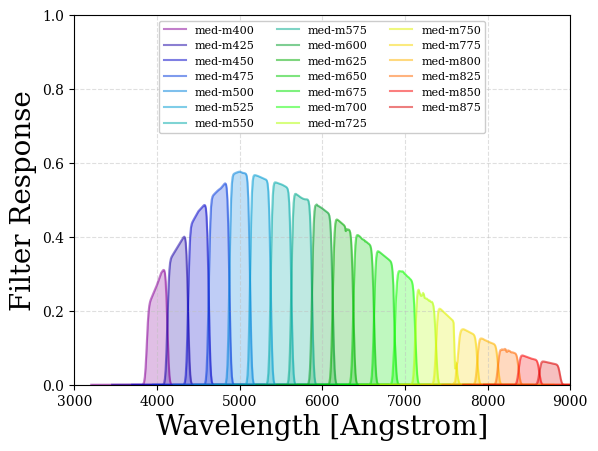

In [186]:
filterlist = np.unique(rsptbl['name'])

for filte in filterlist:
	#	Filter Table
	fltbl = rsptbl[rsptbl['name']==filte]

	_ = speclite.filters.FilterResponse(
		wavelength = fltbl['lam'],
		response = fltbl['response'], meta=dict(group_name='med', band_name=filte)
	)

#	New name for speclite class
mfilterlist = [f"med-{filte}" for filte in filterlist]

#	Medium filters
meds = speclite.filters.load_filters(*mfilterlist)
speclite.filters.plot_filters(meds)
plt.legend(loc='upper center', ncol=3, fontsize=8, framealpha=1.0)
plt.ylim([0, 1.00])
plt.xlim([3000, 9000])
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig('../4.plot/7dt.speclite.png')

## 7DT (Broad-band)

In [187]:
rsptbl = ascii.read('../3.table/sdss.filter.response.realistic_optics.ecsv')
rsptbl

index,name,lam,centerlam,bandwidth,response
,,Angstrom,Angstrom,Angstrom,
int64,str1,float64,float64,float64,float64
0,u,1000.0,3573.89,250.0,0.0
0,u,1009.0,3573.89,250.0,0.0
0,u,1018.0,3573.89,250.0,0.0
0,u,1027.0,3573.89,250.0,0.0
0,u,1036.0,3573.89,250.0,0.0
0,u,1045.0,3573.89,250.0,0.0
0,u,1054.0,3573.89,250.0,0.0
0,u,1063.0,3573.89,250.0,0.0


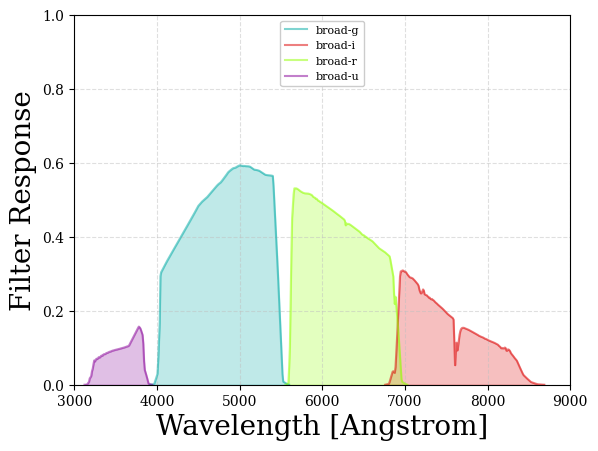

In [188]:
filterlist = np.unique(rsptbl['name'])

# for filte in filterlist:
for filte in ['u', 'g', 'r', 'i']:
	#	Filter Table
	fltbl = rsptbl[rsptbl['name']==filte]

	_ = speclite.filters.FilterResponse(
		wavelength = fltbl['lam'],
		response = fltbl['response'], meta=dict(group_name='broad', band_name=filte)
	)

#	New name for speclite class
bfilterlist = [f"broad-{filte}" for filte in filterlist]

#	Medium filters
broads = speclite.filters.load_filters(*bfilterlist)
speclite.filters.plot_filters(broads)
plt.legend(loc='upper center', ncol=1, fontsize=8, framealpha=1.0)
plt.ylim([0, 1.00])
plt.xlim([3000, 9000])
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig('../4.plot/7dt_bb.speclite.png')

## KMTNet

In [189]:
rsptbl = ascii.read('../3.table/kmtnet/kmtnet_filter.csv')
rsptbl

wavelength,B,V,R,I,g,r,i,z
float64,float64,float64,float64,float64,float64,float64,float64,float64
300.0,0.00086824,0.0009379,0.000962035,0.00074607,0.001368342,0.000866695,0.000566879,0.000717603
300.5,0.00087861,0.000816608,0.000971992,0.00091156,0.001262853,0.000852238,0.000762975,0.000450235
301.0,0.00080155,0.000831069,0.001179453,0.000697974,0.001286726,0.000946996,0.000643803,0.000745895
301.5,0.00085874,0.001038281,0.00105113,0.000774985,0.001174789,0.001085808,0.000790579,0.000638029
302.0,0.00095941,0.000874331,0.001123562,0.00064379,0.001515033,0.001047172,0.000564027,0.000600545
302.5,0.0007387,0.001133661,0.001107999,0.000793741,0.001340873,0.000971553,0.000530266,0.000507219
303.0,0.00093792,0.000873086,0.000963752,0.000716392,0.001287502,0.000893297,0.000508622,0.000521688
303.5,0.00099526,0.000878501,0.001047126,0.00090749,0.001344331,0.001002619,0.000524383,0.000650344
304.0,0.00096968,0.000990891,0.001268882,0.000683026,0.001348014,0.000984112,0.000835772,0.000644404


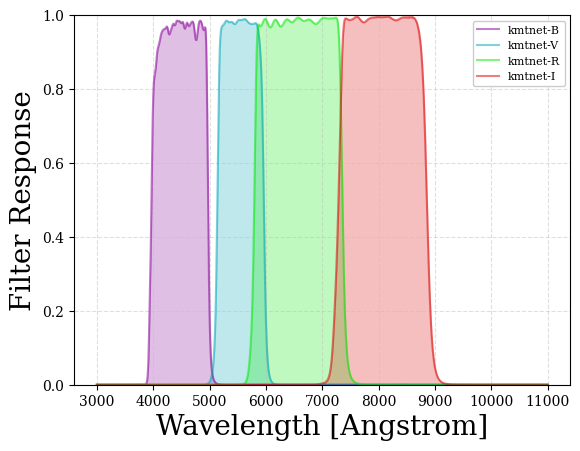

In [190]:
# filterlist = np.unique(rsptbl.keys()[1:])
filterlist = ['B', 'V', 'R', 'I']
for filte in filterlist:
	rsp = rsptbl[filte]
	rsp = rsp*1e-2 # [%] --> [0.0-1.0]
	rsp[0] = 0.0
	rsp[-1] = 0.0
	rsp[rsp<0] = 0.0

	#	Filter Table
	_ = speclite.filters.FilterResponse(
		wavelength = rsptbl['wavelength']*u.nm,
		response = rsp, meta=dict(group_name='kmtnet', band_name=filte)
	)

#	New name for speclite class
kfilterlist = [f"kmtnet-{filte}" for filte in filterlist]

#	KMTNet filters
kmtns = speclite.filters.load_filters(*kfilterlist)
speclite.filters.plot_filters(kmtns)
plt.legend(loc='upper right', ncol=1, fontsize=8, framealpha=1.0)
plt.ylim([0, 1.00])
# plt.xlim([3000, 9000])
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig('../4.plot/kmtnet.speclite.png')

## LSST

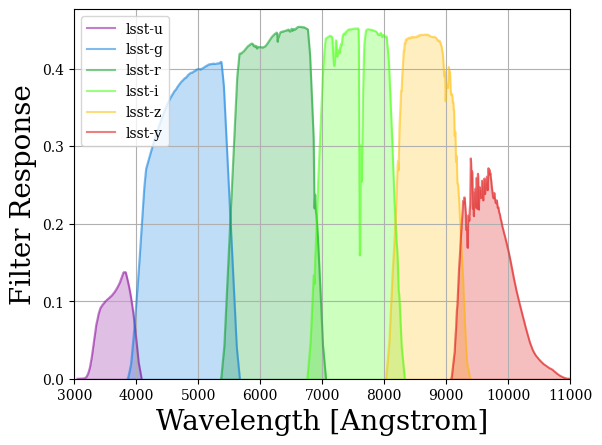

In [191]:
lsst = speclite.filters.load_filters('lsst2016-*')
speclite.filters.plot_filters(
    lsst, wavelength_limits=(3000, 11000), legend_loc='upper left')

# Get the sample spectrum

In [192]:
kncbtbl = Table.read(f"../3.table/kn_cube.lite.spectrum.summary.fits")
indx_kn = np.where(
	(kncbtbl['md']==0.001) &
	(kncbtbl['vd']==0.05) &
	(kncbtbl['mw']==0.001) &
	(kncbtbl['vw']==0.05) &
	(kncbtbl['shape']=='toroidal') &
	(kncbtbl['latitude']=='Axial')
)

kncbtbl[indx_kn]

number,model,shape,latitude,md,vd,mw,vw,type
int64,bytes81,bytes9,bytes5,float64,float64,float64,float64,bytes4
0,Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.05_spec_2020-03-19.fits,toroidal,Axial,0.001,0.05,0.001,0.05,spec


In [193]:
knsp = kncbtbl['model'][indx_kn][0]
knsptbl = Table.read(f"../3.table/kn_sim_cube_lite/{knsp}")
# knsptbl = ascii.read(f"../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.05_spec_2020-03-19.dat")

its = np.array([float(knsptbl.meta['comments'][i].split('= ')[-1]) for i in range(len(knsptbl.meta['comments']))])
its[its<3.1]

array([0.125, 0.136, 0.149, 0.162, 0.177, 0.193, 0.21 , 0.229, 0.25 ,
       0.273, 0.297, 0.324, 0.354, 0.386, 0.42 , 0.459, 0.5  , 0.545,
       0.595, 0.648, 0.707, 0.771, 0.841, 0.917, 1.   , 1.091, 1.189,
       1.297, 1.414, 1.542, 1.682, 1.834, 2.   , 2.181, 2.378, 2.594,
       2.828, 3.084])

In [194]:
knsptbl.meta['comments'][0], knsptbl.meta['comments'][-1]

('it=     0  time[d]=  0.125', 'it=    72  time[d]= 64.000')

- col1, col2 : wavelength bin [cm]
- col3-56    : flux into angular bin at R=10pc [erg/(s*AA*cm2)] --> flam
	- col3 : 0 deg
	- col56 : 180 deg
- Define central wavelength [cm] --> [AA]

In [195]:
angles = np.linspace(0, 180, 54)
# angle = angles[6]
angle = angles[0]
print(f"angle = {angle:1.3f} deg")

angle = 0.000 deg


In [196]:
lam = np.unique(knsptbl['lam'])
step = len(lam)
print(f"STEP : {step}")

STEP : 1024


broad-g,broad-i,broad-r,broad-u
float64,float64,float64,float64
-8.602608310340074,-8.451038670241664,-8.553398487775489,-8.05360795132844


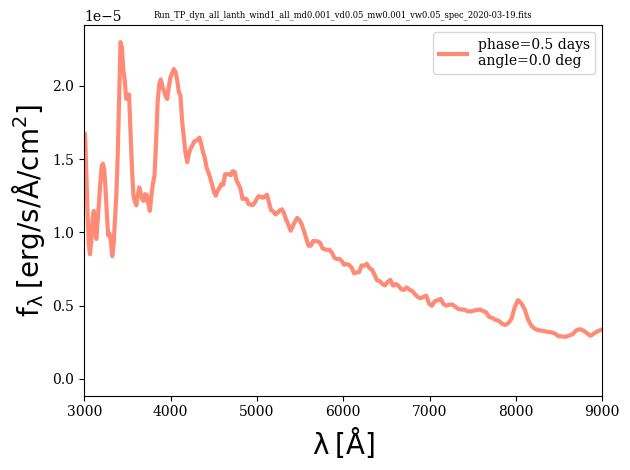

In [197]:
d0 = 10 # [pc]
d1 = 40*1e6 # [pc] --> NGC 4993
fratio = np.sqrt(d0/d1)

# ii=0 : 0th phase
# ii=1 : 1st phase
# ...
# t = 1.0
t = 0.5
ii = np.where(its==t)[0][0]

lam = knsptbl['lam'][step*ii:step*(ii+1)]*u.Angstrom
# lam = ((knsptbl['col1']+knsptbl['col2'])*u.cm/2)[step*ii:step*(ii+1)].to(u.Angstrom)
flam = knsptbl[f'col3'][step*ii:step*(ii+1)]*(u.erg/u.second/u.Angstrom/(u.cm**2))
#	Syn.phot
# broads = lsst
brd_mags = broads.get_ab_magnitudes(flam, lam)


c = 'tomato'
alpha = 0.75
plt.plot(lam, flam, c=c, alpha=alpha, lw=3, label=f'phase={t} days\nangle={angle:1.1f} deg')

plt.title(os.path.basename(knsp), fontsize=6)
plt.xlim([3000, 9000])
plt.xlabel(r'$\rm \lambda\:[\AA]$')
plt.ylabel(r'$\rm f_{\lambda}\:[erg/s/\AA/cm^{2}]$')
plt.legend()
plt.tight_layout()

brd_mags

In [198]:
nu = convert_lam2nu(lam)
nu = nu[np.argsort(nu)]
fnu = convert_flam2fnu(flam, lam)
abmag = fnu.to(u.ABmag)

/Users/paek/opt/miniconda3/envs/kn/lib/python3.10/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))


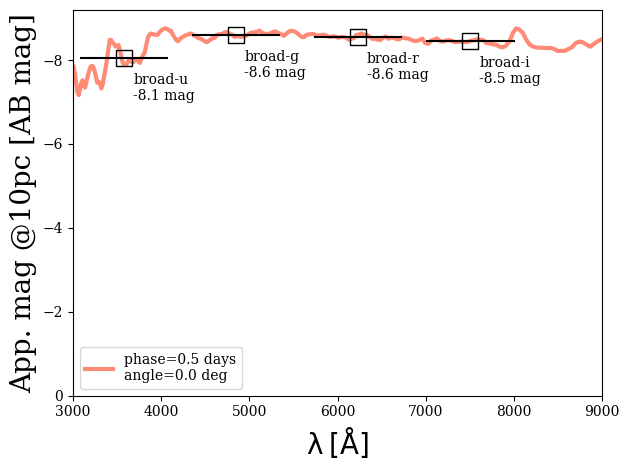

In [199]:
plt.plot(lam, abmag, c=c, alpha=alpha, lw=3, label=f'phase={t} days\nangle={angle:1.1f} deg')
plt.errorbar(broads.effective_wavelengths, brd_mags.as_array().item(), xerr=[1000*u.Angstrom/2]*len(broads.effective_wavelengths), c='k', marker='s', mec='k', mfc='none', ls='none', ms=12)

for ii, lam0 in enumerate(broads.effective_wavelengths):
	m = brd_mags.as_array().item()[ii]
	plt.text(lam0.value+100, m+1.0, s=f"{broads.names[ii]}\n{m:1.1f} mag")

plt.xlim([3000, 9000])
plt.xlabel(r'$\rm \lambda\:[\AA]$')
# plt.ylabel(r'$\rm f_{\lambda}\:[erg/s/Hz/cm^{2}]$')
yl, yu = plt.ylim()
yu = 0
plt.ylim([yu, yl])
plt.ylabel('App. mag @10pc [AB mag]')
plt.legend()
plt.tight_layout()

In [200]:
def organize_synphot2table(filters, flam, lam):
	"""
	meds : speclite class
	"""
	#	Syntetic Photometry Table
	syntbl = Table()
	syntbl['group'] = [name.split('-')[0] for name in filters.names]
	syntbl['name'] = [name.split('-')[1] for name in filters.names]
	syntbl['wavelength'] = [lam for lam in filters.effective_wavelengths]
	syntbl['wavelength'].format = '1.3f'
	syntbl['frequency'] = convert_lam2nu(syntbl['wavelength'])
	syntbl['frequency'].format = '1.3f'

	filters_mag = filters.get_ab_magnitudes(flam, lam)
	syntbl['mag'] = filters_mag.as_array().item()*u.ABmag
	syntbl['mag'].format = '1.3f'
	return syntbl


In [201]:
broads.names

['broad-g', 'broad-i', 'broad-r', 'broad-u']

In [202]:
# m : med
msyntbl = organize_synphot2table(meds, flam, lam)
# s : sdss
ssyntbl = organize_synphot2table(broads, flam, lam)
# k : kmtnet
ksyntbl = organize_synphot2table(kmtns, flam, lam)

# a : all
asyntbl = vstack([msyntbl, ssyntbl, ksyntbl])

asyntbl

group,name,wavelength,frequency,mag
,,Angstrom,Hz,mag(AB)
str6,str4,float64,float64,float64
med,m400,4011.821,747272755941138.125,-8.677
med,m425,4256.732,704278482079032.125,-8.567
med,m450,4505.017,665463567758767.125,-8.507
med,m475,4753.596,630664551911115.000,-8.609
med,m500,5001.383,599419099130655.625,-8.620
med,m525,5250.264,571004546915754.000,-8.646
med,m550,5499.945,545082683189209.812,-8.633
med,m575,5749.741,521401683185410.750,-8.598


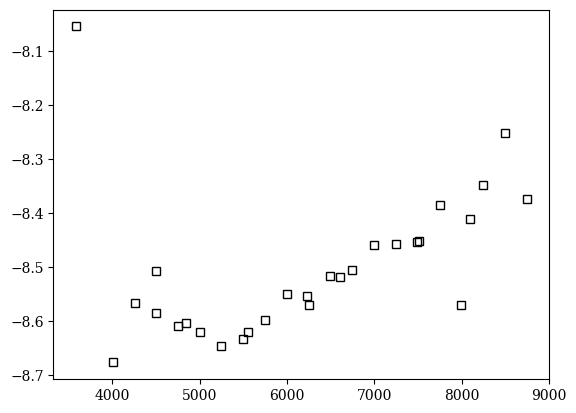

In [203]:
plt.plot(asyntbl['wavelength'], asyntbl['mag'], marker='s', mec='k', mfc='none', ls='none')

Text(0.5, 0, '$\\rm \\lambda\\:[\\AA]$')

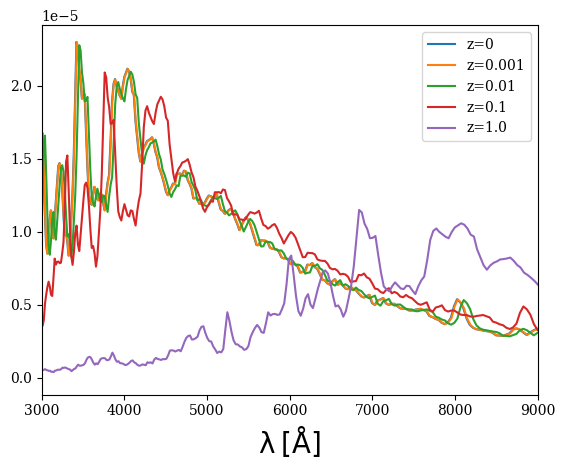

In [207]:
from speclite.redshift import redshift

# z = 0.009783
# z = 0.01
z0 = 0
plt.plot(lam, flam, label=f'z={z0}')

#	There is no distance scaling

for z in [0.001, 0.01, 0.1, 1.0,]:
	result = redshift(z_in=z0, z_out=z, rules=[
	dict(name='wlen', exponent=+1, array_in=lam),
	dict(name='flux', exponent=-1, array_in=flam)])

	plt.plot(result['wlen'], result['flux'], label=f'z={z}')

plt.legend()
plt.xlim([3000, 9000])
plt.xlabel(r'$\rm \lambda\:[\AA]$')

(-5.291795980673931, -9.634424015390232)

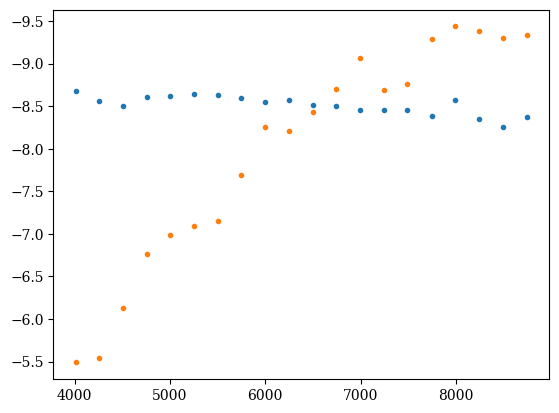

In [206]:
mags_shift = meds.get_ab_magnitudes(result['flux'], result['wlen'])
mags_rest = meds.get_ab_magnitudes(flam, lam)

plt.plot(meds.effective_wavelengths, mags_rest.as_array().item(), marker='.', ls='none')
plt.plot(meds.effective_wavelengths, mags_shift.as_array().item(), marker='.', ls='none')

yl, yu = plt.ylim()
plt.ylim([yu, yl])